Project Objective : 
    To analyze customer transactions data to understand the spending behaviour, geographic trends,merchant interaction, and identify possible anaomolies or patterns that can help enhanced the profitability in financial setting.

In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#Question 1
#Load the dataset and print the first 10 rows, column names, number of transactions, and data types.
#Extract and print unique values from the merchant state?
transactions = pd.read_csv(r"C:\Users\kc88n\Desktop\DA\transactions_data.csv")
print("First 5 rows",transactions.head(10))
print("Number of Transactions",len(transactions))
print("Column names",list(transactions.columns))
print("Data Types before cleaning",transactions.dtypes)
print("First 5 Unique values from the merchant state",transactions["merchant_state"].unique()[:5])
# Insights:
#1. The dataset contains 100,000 transactions.
#2. The dataset has 10 columns. 
#3. The data types of the columns are mostly integers and floats, with some object types for categorical data.
#4. The unique values from the merchant state column show that there are multiple states represented in the dataset.

First 5 rows         id                 date  client_id  card_id   amount  \
0  7475327  2010-01-01 00:01:00       1556     2972  $-77.00   
1  7475328  2010-01-01 00:02:00        561     4575   $14.57   
2  7475329  2010-01-01 00:02:00       1129      102   $80.00   
3  7475331  2010-01-01 00:05:00        430     2860  $200.00   
4  7475332  2010-01-01 00:06:00        848     3915   $46.41   
5  7475333  2010-01-01 00:07:00       1807      165    $4.81   
6  7475334  2010-01-01 00:09:00       1556     2972   $77.00   
7  7475335  2010-01-01 00:14:00       1684     2140   $26.46   
8  7475336  2010-01-01 00:21:00        335     5131  $261.58   
9  7475337  2010-01-01 00:21:00        351     1112   $10.74   

             use_chip  merchant_id merchant_city merchant_state      zip  \
0   Swipe Transaction        59935        Beulah             ND  58523.0   
1   Swipe Transaction        67570    Bettendorf             IA  52722.0   
2   Swipe Transaction        27092         Vista      

In [9]:
#Question 2 :
# Data Cleaning- 
# Converting the data types of the columns to appropriate types

#Converting the amount column to float
transactions['amount'] = transactions['amount'].replace('[\$,]', '', regex=True).astype(float)

#Converting Date into datetime
transactions['date'] = pd.to_datetime(transactions["date"])

print(transactions.amount)
print(transactions.date)
#Insights:
#1. The amount column has been successfully converted to float type and dollar signs have been removed.
#2. The date column has been successfully converted to datetime type.
#3. It's essential for accurate numerical analysis and time series analysis.


<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
C:\Users\kc88n\AppData\Local\Temp\ipykernel_31116\2877430553.py:6: SyntaxWarning: invalid escape sequence '\$'
  transactions['amount'] = transactions['amount'].replace('[\$,]', '', regex=True).astype(float)


0           -77.00
1            14.57
2            80.00
3           200.00
4            46.41
             ...  
13305910      1.11
13305911     12.80
13305912     40.44
13305913      4.00
13305914     12.88
Name: amount, Length: 13305915, dtype: float64
0          2010-01-01 00:01:00
1          2010-01-01 00:02:00
2          2010-01-01 00:02:00
3          2010-01-01 00:05:00
4          2010-01-01 00:06:00
                   ...        
13305910   2019-10-31 23:56:00
13305911   2019-10-31 23:56:00
13305912   2019-10-31 23:57:00
13305913   2019-10-31 23:58:00
13305914   2019-10-31 23:59:00
Name: date, Length: 13305915, dtype: datetime64[ns]


In [ ]:
#Question 3
#Transaction Classification based on dynamic thresholds (user input for high and medium thresholds)

high_threshold = int(input("Enter a high threshold"))
medium_threshold = int(input("Enter a medium threshold"))

#Ensure the thresholds are valid
if medium_threshold >= high_threshold:
    raise ValueError("High threshold must be greater then the medium threshold")

def classify_transaction(amount):
    if amount >=high_threshold:
        return "High"
    elif amount >=medium_threshold:
        return "Medium"
    else:
        return "Low"

#Loop through first 100 amounts to show classification
for x, amount in enumerate(transactions['amount'].head(100)):
   category = classify_transaction(amount) 
   print(f"Transaction {x} is classified as {category}")
    
#Insights:
#1. The transactions have been classified into three categories: High, Medium, and Low based on the user-defined thresholds.
#2. This classification can help in identifying high-value transactions for further analysis or fraud detection.
#3. This classification supports customer segmentation which might indicate different spending behaviors.

Transaction 0 is classified as Low
Transaction 1 is classified as Low
Transaction 2 is classified as Medium
Transaction 3 is classified as High
Transaction 4 is classified as Low
Transaction 5 is classified as Low
Transaction 6 is classified as Medium
Transaction 7 is classified as Low
Transaction 8 is classified as High
Transaction 9 is classified as Low
Transaction 10 is classified as Low
Transaction 11 is classified as Low
Transaction 12 is classified as Low
Transaction 13 is classified as Low
Transaction 14 is classified as Low
Transaction 15 is classified as Low
Transaction 16 is classified as Medium
Transaction 17 is classified as High
Transaction 18 is classified as Low
Transaction 19 is classified as Low
Transaction 20 is classified as Medium
Transaction 21 is classified as Low
Transaction 22 is classified as Medium
Transaction 23 is classified as Medium
Transaction 24 is classified as Low
Transaction 25 is classified as Low
Transaction 26 is classified as Low
Transaction 27 is

In [ ]:
#Question 4

#Currency Conversion
#Convert the amount from USD to INR using a conversion rate provided by the user.
#Displays both the global (USD) and local (INR) currencies.


global_currency = "USD"
USD_2_INR = float(input("Enter the conversion rate from USD to INR"))
def currency(amount):
    local_currency = "INR"
    #if local_currency == "INR":
    converted_amount = amount * USD_2_INR
    print(f"Converted amount is {converted_amount} {local_currency}")
    print(f"Non Converted amount is {amount} {global_currency}")

#Loop through first 100 amounts to show classification
for x, amount in enumerate(transactions['amount'].head(5):
    print("Transaction",x)
    currency(amount)

#Insights:
#1. The currency conversion function successfully converts the amount from USD to INR using the user-provided conversion rate.
#2. Useful for international transactions and understanding the value of transactions in different currencies.
#3. This can help in financial reporting and analysis for businesses operating in multiple countries.

Transaction 0
Converted amount is -70.84 INR
Non Converted amount is -77.0 USD
Transaction 1
Converted amount is 13.4044 INR
Non Converted amount is 14.57 USD
Transaction 2
Converted amount is 73.60000000000001 INR
Non Converted amount is 80.0 USD
Transaction 3
Converted amount is 184.0 INR
Non Converted amount is 200.0 USD
Transaction 4
Converted amount is 42.6972 INR
Non Converted amount is 46.41 USD


In [ ]:
#Question 5

#Statistical Analysis
#Statistical summary of the transaction amounts
#Display the mean, median, standard deviation, and percentiles of the transaction amounts.
amt_stats = transactions.amount.to_numpy()
print(f"Mean= {np.mean(amt_stats):.2f}")
print(f"Median= {np.median(amt_stats):.2f}")
print(f"Standard Deviation= {np.std(amt_stats):.2f}")
print(f"25th Percentile= {np.percentile(amt_stats, 25):.2f}")
print(f"75th Percentile= {np.percentile(amt_stats, 75):.2f}")

#Insights:
#1. The statistical summary provides insights into the distribution of transaction amounts.
#2. These measures can help understand the distribution of spending.
#3. The mean and median can indicate the central tendency, while the standard deviation shows the variability in transaction amounts.
#4. The percentiles can help identify the range of transaction amounts and outliers.


Mean= 42.98
Median= 28.99
Standard Deviation= 81.66
25th Percentile= 8.93
75th Percentile= 63.71


In [ ]:
#Question 6:

#Geographic Analysis - State level Summary
# Group data by merchant state to understand the geographic performance
# Calculate total transactions, high-value transactions, and average transaction amount for each state
# Classify states based on traffic categories (high, medium, low) based on the number of transactions
# High value transactions are defined as those above the high threshold


#Merchant state, total transactions, high value count, average amount, traffic category
merchant_state_summary = transactions.groupby("merchant_state").agg(
total_transactions=('id','count'),
high_value_count = ('amount', lambda x: (x >= high_threshold).sum()),
average_amount=('amount','mean')).reset_index()
#print(merchant_state_summary)            

#Add traffic category
def traffic_category(row):      #row represents each row of the merchant_state_summary dataframe
    if row.total_transactions >= 10000:
        return "High traffic"
    elif row.total_transactions >= 5000:
        return "Medium traffic"                 
    else:
        return "Low traffic"
    
#print(traffic_category(merchant_state_summary.iloc[10])) #Test the function with the first row of the dataframe

merchant_state_summary['traffic_category'] = merchant_state_summary.apply(traffic_category, axis = 1)
#apply is used to apply functions to each row or column of a dataframe
#axis = 1 means apply the function to each row
#print(merchant_state_summary.head(10)) #Print the first 10 rows of the summary

#Insights:
#1. The summary provides a comprehensive view of transaction performance by state.
#2. It helps identify high performing and underperfroming regions and their contribution to overall transactions.
#3. The traffic category can help in understanding the market potential and customer engagement in different states.
#4. Assist in geo-targeted marketing strategies and resource allocation.

        merchant_state  total_transactions  high_value_count  average_amount  \
0                   AA                   6                 0       20.620000   
1                   AK                7581              4131       74.386147   
2                   AL              177266             14763       36.214058   
3                   AR              112901              7221       33.083178   
4                   AZ              195940             21713       41.474642   
5              Albania                   5                 0        6.068000   
6              Algeria                   8                 0       17.877500   
7              Andorra                  32                 0       24.328437   
8  Antigua and Barbuda                  16                 0       39.378125   
9            Argentina                  95                19       39.234526   

  traffic_category  
0      Low traffic  
1   Medium traffic  
2     High traffic  
3     High traffic  
4     High tra

In [ ]:
#Converting summary to CSV file
merchant_state_summary.to_csv(r"C:\Users\kc88n\Desktop\DA\merchant_state_summary.csv", index = False)
print("Merchant state summary saved to csv file")

Merchant state summary saved to csv file


#Data Visualization- Matplotlib

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

merchant_city
Houston         146917
Miami            87388
Brooklyn         84020
Los Angeles      82004
Chicago          72540
Dallas           71864
Louisville       66088
Philadelphia     61419
San Antonio      59265
Name: count, dtype: int64


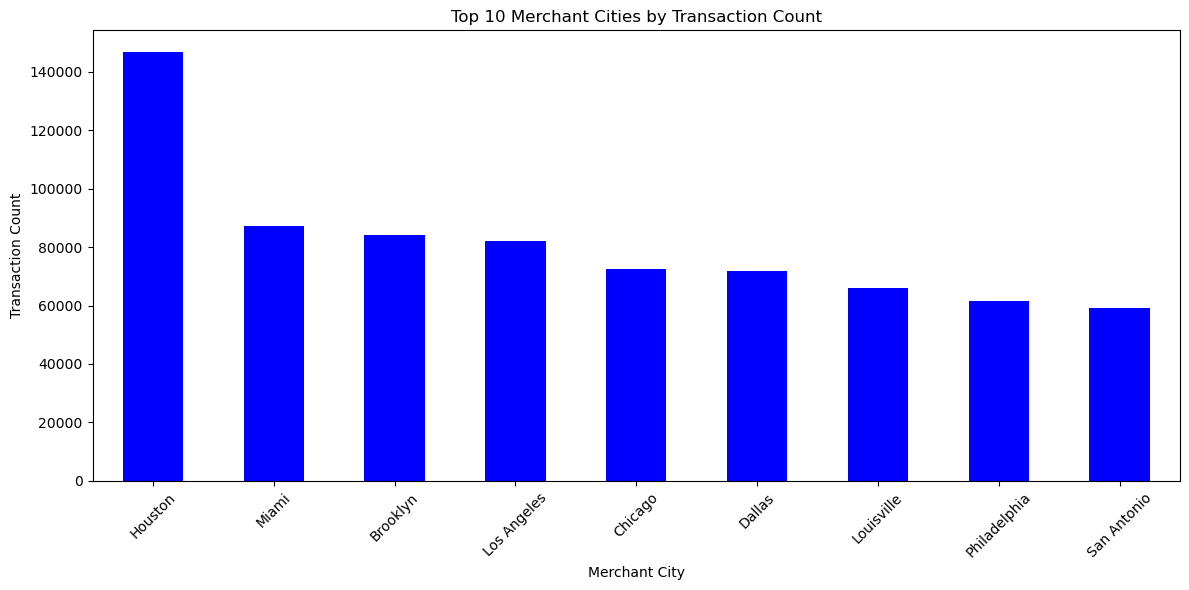

In [ ]:
#Question 7 - What are the top 10 merchant cities by transaction, and what insights can we derived from the relative transactions volume?

#Objective: To identified and analyzed the top perfroming merchant cities by transactions volume allowing businesses to focus on high-value markets.

#Count of transactions by merchant city
city_counts = transactions.merchant_city.value_counts().head(10)
city_counts = city_counts.iloc[1:]  # It skips first merchant city which is 'Online' and not a city
print(city_counts)
city_counts.plot(kind = "bar", figsize = (12,6), color = "blue")
plt.title("Top 10 Merchant Cities by Transaction Count")
plt.xlabel("Merchant City") 
plt.ylabel("Transaction Count")
plt.xticks(rotation = 45)   
plt.tight_layout()
plt.show()

#Insights - 
# Houston leads signifcantly in transaction volume, indicating a strong market presence.Possible reasons could be a larger customer base or more active merchants in the area.
# Other cities like Dallas, Austin, and San Antonio also show significant transaction volumes, suggesting a healthy market in Texas.
# Smaller cities like El Paso and Fort Worth have lower transaction volumes, indicating potential areas for growth or less market activity.



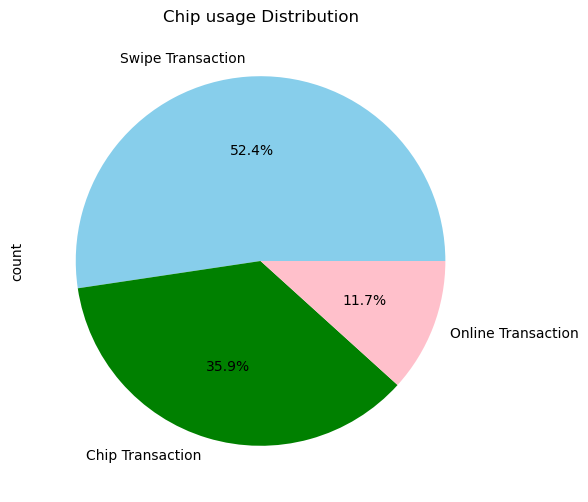

In [ ]:
#Question 8 - # What proportions of transactions were conducted using chip enabled cards versus other methods?

#Objective: To understand the usage of chip-enabled cards in transactions, which can indicate customer preferences and security measures.

# pie chart - chips usage shared
import matplotlib.pyplot as plt
chip_usage = transactions.use_chip.value_counts()
#plt.figure(figsize = (6,6))
chip_usage.plot(kind = "pie",autopct = "%1.1f%%",figsize =  (6,6), colors = ["skyblue","green","pink"]) #colors = ["#66b3ff","#ff9999","#4caf50"]
#plt.pie(chip_usage,labels = ["Swipe Transactions","Online Transactions"],autopct = "%1.1f%%",colors = ["#66b3ff","#ff9999"])
plt.title("Chip usage Distribution")
plt.show()

#Insights:
#1. The pie chart shows the distribution of chip-enabled card usage in transactions.
#2 Swipe transactions dominate the usage with a significant proportion, indicating strong adoption of secured payment methods.
#3. Online transactions also show a considerable share, reflecting the growing trend of digital payments.



In [ ]:
#Summary of the code:
# Selects the top 5 merchant cities by total transactions  amount, excluding the first city which is 'Online'.

import pandas as pd
import matplotlib.pyplot as plt
city_wise_amt = transactions.groupby("merchant_city")["amount"].sum().sort_values(ascending=False).head(5)
city_wise_amt = city_wise_amt.iloc[1:]
print(city_wise_amt)

merchant_city
Houston          6615630.78
Miami            3553176.82
Louisville       3196075.85
San Francisco    3184666.93
Name: amount, dtype: float64


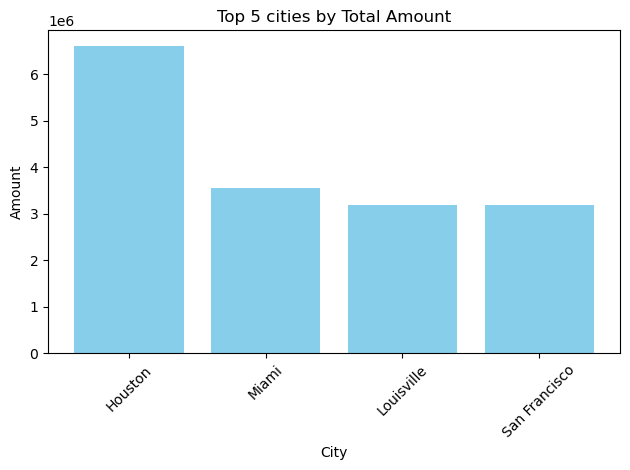

In [ ]:
#Question 9 - Which market cities ranked above the top 5 in terms of total transaction amount?

#Objective: To visualize the top 5 merchant cities by total transaction amount, providing insights into the highest revenue-generating markets.


#Bar chart - top 10 merchant cities by amount
#plt.figure(figsize = (12,7))
plt.bar (city_wise_amt.index, city_wise_amt.values, color = "skyblue")  #index represents x axis and values represent y axis
plt.title ("Top 5 cities by Total Amount")
plt.xlabel ('City')
plt.ylabel('Amount')
plt.xticks(rotation = 45)  #rotates the x-axis labels by 45 degree
plt.tight_layout()  #automatically adjust padding and layout
plt.show()

#Insights: 
#1. These cities generate significant revenue for the business, indicating strong market presence.
#2. The bar chart provides a clear visual representation of the top-performing cities, making it easy to identify key markets.


C:\Users\kc88n\AppData\Local\Temp\ipykernel_17668\559375924.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "merchant_state", y = "average_amount", data = top_10summary, palette = "viridis")


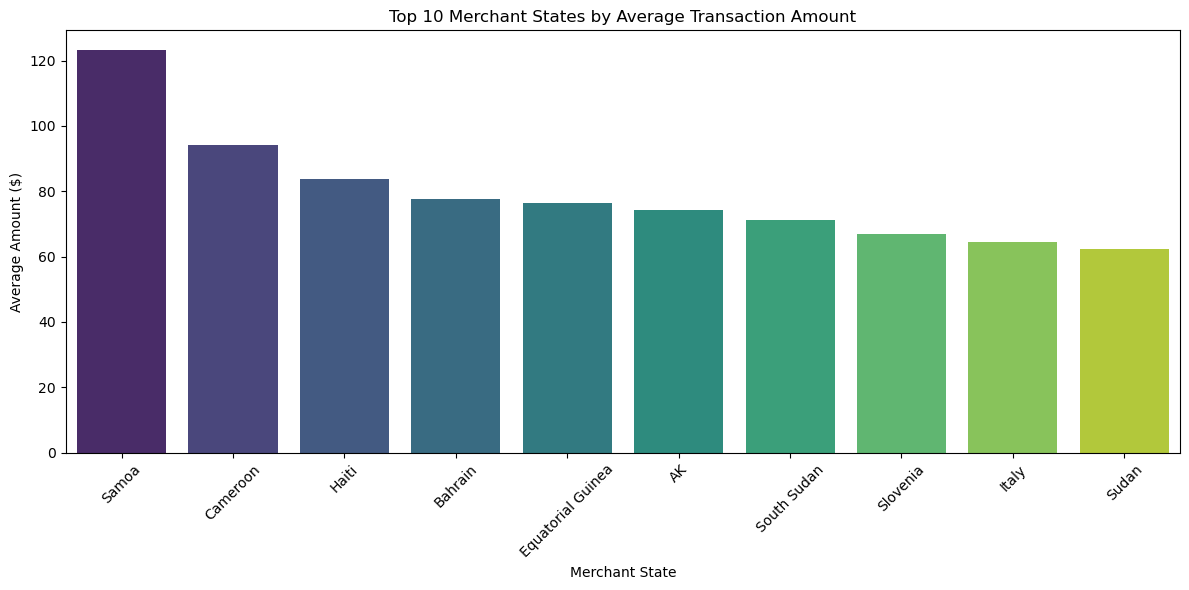

In [ ]:
#Question 10 - What are the top 10 merchant states by average transaction amount?

#Objective: To identify the top 10 merchant states by average transaction amount, providing insights into high-value markets.To understand high value markets, geographic distribution of transaction amounts, and potential areas for growth.

#Bar chart of average transaction amount by merchant state using merchant_state_summary
top_10summary = merchant_state_summary.sort_values(by = "average_amount", ascending = False).head(10)
plt.figure(figsize = (12,6))
sns.barplot(x = "merchant_state", y = "average_amount", data = top_10summary, palette = "viridis")
plt.title("Top 10 Merchant States by Average Transaction Amount")
plt.xlabel("Merchant State")
plt.ylabel("Average Amount ($)") 
plt.xticks(rotation = 45)
plt.tight_layout()  
plt.show()

#Insights:
#1. The bar chart shows the top 10 merchant states by average transaction amount, highlighting high-value markets.
#2. States like Samoa, Cameroon, and Haiti lead in average transaction amounts, indicating strong economic activity.
#3. This information can help businesses focus on high-value markets for targeted marketing and selling premium products or products in bulk.

API - Application Programming Interfaces
Objective - Enrich state information using an API 
Question - Use the zippopotam.us API to gather geographical information for each unique US state 
Found in merchant_state column. This helps expand the dataset with external location metadata which is useful for segementation, regional performance analysis and fraud detection. 

In [ ]:
# Question 11 - Currency Conversion : How can we convert transactions amounts from USD to another currency (INR) using a currency exchange API?

# Objective: To convert the transaction amounts from USD to another currency (INR) using a currency exchange API and create a new column with the converted values.
# Use currency exchange API to dynamically fetch the exchange rate from USD to INR and convert the transaction amounts accordingly.
import requests
import pandas as pd

url = 'https://api.exchangerate-api.com/v4/latest/USD'
response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    rate_INR = data['rates']['INR']  # Get the exchange rate for INR

    transactions['amount_in_INR'] = transactions['amount'] * rate_INR  # Create a new column with converted values
    print(transactions[['amount', 'amount_in_INR']])  # Display the first 10 rows of the original and converted amounts
else:
    print("Failed to fetch exchange rates. Please check the API URL or your internet connection.")

#Insights:
#1.The code fetches the current exchange rate from USD to INR using an API and converts the transaction amounts accordingly.
#2 Converting USD to INR enables region specific revenue traffic which is useful for operating in international markets.
#3. The new column 'amount_in_INR' provides a clear view of the transaction amounts in the local currency, facilitating financial analysis and reporting.



          amount  amount_in_INR
0         -77.00     -6573.4900
1          14.57      1243.8409
2          80.00      6829.6000
3         200.00     17074.0000
4          46.41      3962.0217
...          ...            ...
13305910    1.11        94.7607
13305911   12.80      1092.7360
13305912   40.44      3452.3628
13305913    4.00       341.4800
13305914   12.88      1099.5656

[13305915 rows x 2 columns]


Web Scraping 


In [ ]:
#Question 12: Enrich e-commerce transactions data with geographical information by descriptive details about the merchant states from an external source like a wikipedia page (only for CA)..
#Objective: To dynamically fetch descriptive information about the merchant states from an external source (Wikipedia) and enrich the e-commerce transactions data with this information.
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

# Fetching data from Wikipedia page for California

#url = "https://en.wikipedia.org/wiki/California"

state_map = {
    'CA': 'California',
    'TX': 'Texas',  
    'NY': 'New York',
}

# Find the first mechant state that matches the mapping keys 

match_state_abbr = None
for x in transactions["merchant_state"].unique():
    if x in state_map:
        match_state_abbr = x
        break
if not match_state_abbr:
        print("No matching state abbreviation found in the transactions data.")
else:
     state_name = state_map[match_state_abbr]
     #print(f"First matching state abbreviation found: {match_state_abbr} for {state_name}")

#Web scraping the Wikipedia page for California
url = f"https://en.wikipedia.org/wiki/{state_name}"
response = requests.get(url)

soup = BeautifulSoup(response.text, 'html.parser')
paragraph = soup.find_all('p')  # Find the first paragraph in the page

for para in paragraph:
     text = para.get_text(strip = True) #<p> any paragraph </p>
     if len(text) > 100:    # Filters out short or empty paragraphs-many early <p> tags contains pronounciations legal notice or empty spaces
        print(f"Information about {state_name}:\n {text}")
        break
     
#Insights: 
#1 The code fetches descriptive information about California from its Wikipedia page, providing insights into the state's geography, economy, and culture.
#2 This information enhances presentations with contextual details beyond the raw numbers.
#3 The descriptive details can help in understanding the market dynamics and customer behavior.
#4 This code can be extended to fetch information for other states by adding them to the `state_map` dictionary.
#5 The use of web scraping allows for dynamic fetching of information, ensuring that the data is up-to-date and relevant.






Information about California:
 California(/ˌkælɪˈfɔːrnjə/) is astatein theWestern United Statesthat lies on thePacific Coast. It bordersOregonto the north,NevadaandArizonato the east, and sharesan international borderwith theMexicanstate ofBaja Californiato the south. With over 39million residents across an area of 163,696 square miles (423,970 km2), it is thelargest state by populationandthird-largest by area.
